### Objective : 
#### To apply NB (Naive Bayes algorithm) on Amazon food reviews dataset for each of the vectorization below : 
                  1. Bag Of Words (BoW)
                  2. TermFrequency-InverseDocumentFrequency (TF-IDF)
                  
#### To determine the sentiment polarity, i,e.  Given a food review text, predict whether the score is Positive or Negative.
#### NOTE :
    1. Sort the dataset based on timestamp in ascending order.
    2. Split the dataset into Training (60%),Cross-validation (20%) and Test (20%) .
    3. Apply Elbow-Method on the cross-validation set to find optimal 'alpha' in Naive Bayes.
    4. Determine feature importance for positive and negative classes.
    5. Compute and report the following performane metrics for the 2 type of vectorization mentioned above.
       (a) Accuracy
       (b) Precision
       (c) Recall
       (d) F1-Score
       (e) Confusion Matrix
    6. Compute the above Performance Metric for :
       (a) Text process the review comments without adding the contents of the summary column in Amazon food review dataset.
       (b) Text process the review comments with adding the contents of the summary column in Amazon food review dataset.

#### Load the required libraries.

In [1]:
# Load the required libraries.
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import pickle
# Install prettytable
import sys
!{sys.executable} -m pip install https://pypi.python.org/packages/source/P/PrettyTable/prettytable-0.7.2.tar.bz2

  Using cached prettytable-0.7.2.tar.bz2
  Running setup.py bdist_wheel for prettytable: started
  Running setup.py bdist_wheel for prettytable: finished with status 'done'
  Stored in directory: C:\Users\Vijay Joseph\AppData\Local\pip\Cache\wheels\29\73\c9\3e063a66859af18585f8e1439f92dcc27b8c13ae400bb8c89e
Successfully built prettytable


You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


#### Load the Pre-processed Amazon Reviews Dataset.

In [2]:
# Load the pre-processed Amazon food review dataset.
# Please note : the contents of the file "finalCleanedText" contains Text inclusive of summary comments 
# present in the Amazon food review dataset.

final = ''
final = pd.read_csv("finalCleanedText.csv")

#### Apply Time Based Sorting (TBS).

In [3]:
# Add a new column for TimeStamp that is of Datetime datatype,since the dataset's time column is of integer datatype.
import datetime

# Assign the Time column to a new variable.
final_timesplit = final['Time']

# Convert the datatype of the time column from integer to datetime.
final_timesplit = final_timesplit.apply(datetime.datetime.fromtimestamp)

# Create a new column to store the new time column whose datatype is datetime
final['TimeSplit']  = final_timesplit

# Sort the final dataset in descending order of time.
final_dataset = final.sort_values(['TimeSplit'],ascending=False)

#### Sample all the points based on time based sorting

In [4]:
#Sample all the points after time based sorting
final = final_dataset
# Store label info separately.
label = final['Score']

In [5]:
# Print the shape of the input variables and output variables.
print(final.shape)
print(label.shape)

(364171, 14)
(364171,)


In [6]:
# The class label "Score" has distinct values as Positive and Negative, convert them to 1 for Postive and 0 for Negative.
print(label[:5])
Y = final['Score'].map({"positive":1,"negative":0})
print(Y[:5])

262240    positive
33119     positive
353804    negative
328939    negative
296377    positive
Name: Score, dtype: object
262240    1
33119     1
353804    0
328939    0
296377    1
Name: Score, dtype: int64


#### Split the data into Train, Cross-validation and Test dataset.
    ==> Train = First 60% of the sorted complete dataset.
    ==> CV    = Next  20% of the sorted complete dataset.
    ==> Test  = Last  20% of the sorted complete dataset.

In [7]:
# Assign the cleaned text and the class label for the split.
X = final['CleanedText']
Y = final['Score'].map({"positive":1,"negative":0})

# Split the dataset in the following ratios:
# Total row considered is 364171.

# Input split
X_train = X[0:218502]           #Train = First 60% of the sorted dataframe;
X_cv    = X[218503:291336]      #CV    = Next  20% of the sorted dataframe;
X_test  = X[291337:364170]      #Test  = Remainning 20% of the sorted dataframe.

#Class lable split.
Y_train = Y[0:218502]           #Train = First 60% of the sorted dataframe;
Y_cv    = Y[218503:291336]      #CV    = Next  20% of the sorted dataframe;
Y_test  = Y[291337:364170]      #Test  = Remainning 20% of the sorted dataframe.

In [8]:
# Load the prettytable
from prettytable import PrettyTable

# Instantiate the prettytable module.
summaryTable = PrettyTable()
# Set the column names for the table.
summaryTable.field_names = ["Text-VectorizationType","Hyper-Paramter(alpha)","Performance Metric", "Value"]

### Vectorization Method : Bag Of Words (BoW)

#### Convert reviews present in trainingset into numeric vectors using Bag Of Words (BoW)

In [9]:
# Apply BoW vectorization.

#Instantiate the BoW vectorizer.
count_vect = CountVectorizer(ngram_range=(1,2)) #in scikit-learn bi-gram

#Train you countvectorizer on the train data
final_counts = count_vect.fit_transform(X_train.values.astype('U'))

#Print the type,shape and unique words of the BoW vectorizer on the training set. 
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (218502, 2220905)
the number of unique words  2220905


#### Use the BoW vectorizer trained in the preceding step to convert CVset and Testset to vectors.

In [10]:
#Use the same vectorizer trained on the training set, on the cv set.
final_counts_cvset = count_vect.transform(X_cv.values)

#Print the type,shape and unique words of the BoW vectorizer on the testset. 
print("the type of count vectorizer ",type(final_counts_cvset))
print("the shape of out text BOW vectorizer ",final_counts_cvset.get_shape())
print("the number of unique words ", final_counts_cvset.get_shape()[1])

#Use the same vectorizer trained on the training set, on the test set.
final_counts_testset = count_vect.transform(X_test.values)

#Print the type,shape and unique words of the BoW vectorizer on the testset. 
print("the type of count vectorizer ",type(final_counts_testset))
print("the shape of out text BOW vectorizer ",final_counts_testset.get_shape())
print("the number of unique words ", final_counts_testset.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (72833, 2220905)
the number of unique words  2220905
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (72833, 2220905)
the number of unique words  2220905


#### Standardize Data

In [11]:
# Data-preprocessing: Normalizing the data

# Import the Normailizer module.
from sklearn.preprocessing import Normalizer

# Instantiate the Normailizer module.
normalizer = Normalizer()

#Standardize the normailizer on the train data.
X_train_stdzd = normalizer.fit_transform(final_counts)

#Standardize the normailizer on the cv data.
X_cv_stdzd = normalizer.fit_transform(final_counts_cvset)

# use the same normalizer on the test set.
X_test_stdzd  = normalizer.transform(final_counts_testset) 

#### Hyper-Parameter Tuning : Using the cross-validation dataset to calculate the optimal 'alpha' of Naive Bayes in BoW case.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


[0.0, -2.3025850929940455, -4.605170185988091, -6.907755278982137, -9.210340371976182, -11.512925464970229]
[0.8459848401625838, 0.8717313086097969, 0.9174543541964084, 0.9073867937129881, 0.8965694029413488, 0.8893262261986028]


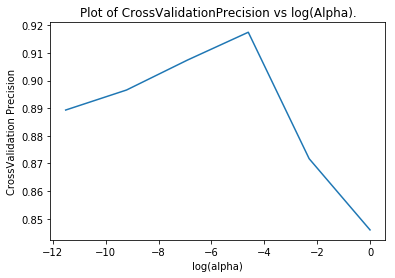

Starttime is : 2018-11-15 11:22:04.578663
Endtime   is : 2018-11-15 11:22:10.375686


In [12]:
# Import the Multinomial NaiveBayes,GridSearchCV and precision modules.
# Reasoning for choosing MultinomialNB : MultinomialNaiveBayes is the preferred choice for text classification problems.
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import precision_score

# Set the start time of the current cell run.
starttime_nb_bow = datetime.datetime.now()

# Set the range for the hyper-parameters.
# We Know from theory:
#          when alpha = 0, then model overfits
#          when alpha is large ~= 10000, then model underfits

# Experiment with different combination of alpha ranges.
#alpha = [10000.0,1000.0,100.0,10.0,1.0,0.0]
#alpha = [10.0,9.0,8.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0,0.0]
alpha = [1.0,0.1,0.01,0.001,0.0001,0.00001]
#alpha = [0.1,0.08,0.06,0.04,0.02,0.01,0.008,0.006,0.004,0.002,0.001]
# Use the cross-validation dataset to determine the best hyper-parameter alpha.
# Loop through various values of alpha.
plot_X = []
plot_Y = []
for i in alpha:
    nb_optimal = MultinomialNB(alpha=i)          # Iterate through various values of alpha.
    nb_optimal.fit(X_train_stdzd, Y_train)       # fitting the Multinomial NaivesBayes model on the training set.
    Y_pred = nb_optimal.predict(X_cv_stdzd)      # predict the response from the Multinomial NaivesBayes model on the cv set.
    plot_X.append(np.log(i))                     # plot log(alpha) in the x-axis.
    plot_Y.append(precision_score(Y_cv,Y_pred))  # plot precision score in the y-axis.

#print X,Y
print(plot_X)
print(plot_Y)

# Plot X-axis = log(alpha),Y-axis = precision to determine the best hyper-parameter.
plt.plot(plot_X,plot_Y)
plt.title("Plot of CrossValidationPrecision vs log(Alpha).")  # Set the title of the plot.
plt.xlabel("log(alpha)")                                      # Set the x label of the plot.
plt.ylabel("CrossValidation Precision")                       # Set the y label of the plot
plt.show()                                                    # render the plot.

# Set the end time of the current cell run.
endtime_nb_bow = datetime.datetime.now()

# Print the cell run duration.
print("Starttime is : {}".format(starttime_nb_bow))
print("Endtime   is : {}".format(endtime_nb_bow))

In [13]:
# Print the shape of the Input features X and class label Y for training and test set.
print("Trainingset X: {}".format(X_train_stdzd.shape))
print("CVset       X: {}".format(X_cv_stdzd.shape))
print("Testset     X: {}".format(X_test_stdzd.shape))

print("Trainingset Y: {}".format(Y_train.shape))
print("CVset       Y: {}".format(Y_cv.shape))
print("Testset     Y: {}".format(Y_test.shape))

Trainingset X: (218502, 2220905)
CVset       X: (72833, 2220905)
Testset     X: (72833, 2220905)
Trainingset Y: (218502,)
CVset       Y: (72833,)
Testset     Y: (72833,)


#### Error plots for varying combination of apha ranges.

#### Aplha range : 0 to 10000

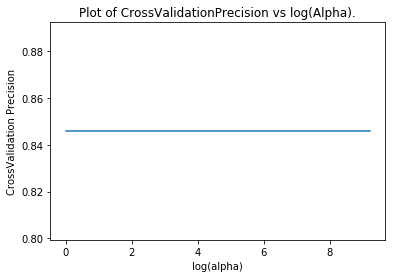

#### Observations :
    We observe, the curve moving towards a uniform distribution.
    Here alpha ranges from 0 to 10000.

#### Alpha Range : 0 to 10

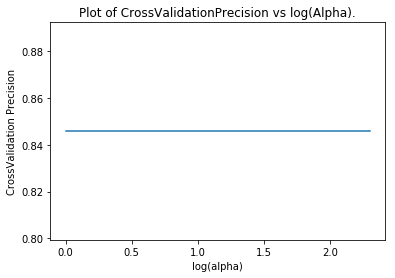

#### Observations :
    We observe, the curve moving towards a uniform distribution.
    Here alpha ranges from 0 to 10.

#### Alpha range : 0 to 1

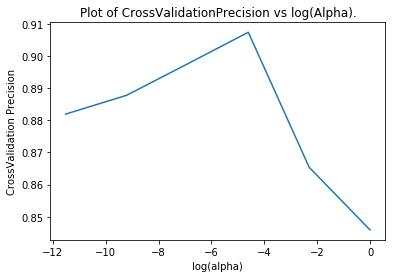

#### Observations :
    The cross-validation precision is maximum when log(alpha) ~= -4.6 .
    Therefore alpha = exponential(log(alpha)) = np.exp(-4.6) = 0.01
    Here alpha ranges from 0 to 1.

#### Hyper-parameter Choice : 
      Based on the CV plots for varying combination of alpha ranges, alpha = 0.01 when alpha range is between 0 and 1 is the best choice.

#### Fit the Naive Bayes model in BoW case in the test set and compute the error metrics.

In [14]:
# ============================== NB with alpha = optimal alpha ===============================================

# Set the start time of the current cell run.
starttime_nb_bow = datetime.datetime.now()

# instantiate the Multinomial NaivesBayes learning model with alpha = 0.01 based on the above error plots .
nb_optimal = MultinomialNB(alpha=0.01)
nb_optimal.fit(X_train_stdzd, Y_train)           # fitting the Multinomial NaivesBayes model.
Y_pred_test = nb_optimal.predict(X_test_stdzd)   # predict the response from the Multinomial NaivesBayes model.

# Set the end time of the current cell run.
endtime_nb_bow = datetime.datetime.now()

# Print the cell run duration.
print("Starttime : {}".format(starttime_nb_bow))
print("Endtime   : {}".format(endtime_nb_bow))

Starttime : 2018-11-15 11:22:50.329726
Endtime   : 2018-11-15 11:22:50.838627


#### Plot the classifier performance metrics.

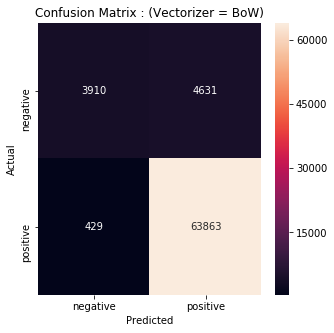

In [15]:
# evaluate the model and report the metrics.
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Y_test, Y_pred_test)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d'
            ,xticklabels=['negative','positive'], yticklabels=['negative','positive'])
plt.title('Confusion Matrix : (Vectorizer = BoW)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [16]:
#Class composition in the testset.
dfYTest = pd.DataFrame(list(Y_test),columns=['Comment'])
#print(list(Y_test))
print(dfYTest["Comment"].value_counts())

1    64292
0     8541
Name: Comment, dtype: int64


In [18]:
# Load the classification metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# Load the prettytable
from prettytable import PrettyTable

# Instantiate the prettytable module.
x = PrettyTable()
# Set the column names for the table.
x.field_names = ["Text-VectorizationType","Performance Metric", "Value"]

# Add the classification metrics to the table.
x.add_row(['BoW','Accuracy',accuracy_score(Y_test,Y_pred_test)])
x.add_row(['-','Precision',precision_score(Y_test,Y_pred_test)])
x.add_row(['-','Recall',recall_score(Y_test,Y_pred_test)])
x.add_row(['-','F1 Score',f1_score(Y_test,Y_pred_test)])
x.add_row(['-','ConfusionMatrix',confusion_matrix(Y_test, Y_pred_test)])
x.add_row(['----------','-----------','----------'])

# Add the classification metrics to the final summary table.
summaryTable.add_row(['BoW','0.01','Accuracy',accuracy_score(Y_test,Y_pred_test)])
summaryTable.add_row(['-','0.01','Precision',precision_score(Y_test,Y_pred_test)])
summaryTable.add_row(['-','0.01','Recall',recall_score(Y_test,Y_pred_test)])
summaryTable.add_row(['-','0.01','F1 Score',f1_score(Y_test,Y_pred_test)])
summaryTable.add_row(['-','0.01','ConfusionMatrix',confusion_matrix(Y_test, Y_pred_test)])
summaryTable.add_row(['----------','-----------','----------','----------'])


# Apply data alignment.
x.align["Value"] = "l"

# Print the table.
print("Performance Metrics :")
print(x)

Performance Metrics :
+------------------------+--------------------+--------------------+
| Text-VectorizationType | Performance Metric | Value              |
+------------------------+--------------------+--------------------+
|          BoW           |      Accuracy      | 0.9305259978306537 |
|           -            |     Precision      | 0.9323882383858441 |
|           -            |       Recall       | 0.9933273191065762 |
|           -            |      F1 Score      | 0.961893573117648  |
|           -            |  ConfusionMatrix   | [[ 3910  4631]     |
|                        |                    |  [  429 63863]]    |
|       ----------       |    -----------     | ----------         |
+------------------------+--------------------+--------------------+


#### Feature Importance

In [21]:
## Feature Importance : Gets the top 10 features based on importance for both positive and negative classes.
neg_class_prob_sorted = nb_optimal.feature_log_prob_[0, :].argsort()
pos_class_prob_sorted = nb_optimal.feature_log_prob_[1, :].argsort()

# Sorted on ascending order the top 10 features by importance.
features_negativeclass = (np.take(count_vect.get_feature_names(), neg_class_prob_sorted[2220895:]))
features_positiveclass = (np.take(count_vect.get_feature_names(), pos_class_prob_sorted[2220895:]))

print("The top 10 features for negative class are : \n{}".format(features_negativeclass))
print()
print("The top 10 features for positive class are : \n{}".format(features_positiveclass))

The top 10 features for negative class are : 
['coffe' 'buy' 'tri' 'good' 'would' 'one' 'flavor' 'product' 'like' 'tast']

The top 10 features for positive class are : 
['one' 'coffe' 'use' 'product' 'flavor' 'like' 'tast' 'good' 'love'
 'great']


In [22]:
# Print the top 10 features of positive and negative classes in a prettytable format.
from prettytable import PrettyTable

# Instantiate the prettytable method.
x = PrettyTable()
# Set the column names for the table.
x.field_names = ["ClassType","FeatureRank", "FeatureName"]

# Add top 10 features of the Negative class.
for icount,ele in enumerate(list(features_negativeclass[::-1])):   # sort the top 10 features in descending order, based on importance.
    x.add_row(['Negative',(icount+1),ele])                         # add the feature to the table.

x.add_row(['----------','-----------','----------------'])         # add a line break to indicate class separation.

# Add top 10 features of the Positive class.
for icount,ele in enumerate(list(features_positiveclass[::-1])):   # sort the top 10 features based on importance.
    x.add_row(['Positive',(icount+1),ele])                         # add the feature to the table.

# Left align the entries of the column "FeatureName"    
x.align["FeatureName"] = "l"

#Print the table.
print("Top 10 Features By Importance :")
print(x)

Top 10 Features By Importance :
+------------+-------------+------------------+
| ClassType  | FeatureRank | FeatureName      |
+------------+-------------+------------------+
|  Negative  |      1      | tast             |
|  Negative  |      2      | like             |
|  Negative  |      3      | product          |
|  Negative  |      4      | flavor           |
|  Negative  |      5      | one              |
|  Negative  |      6      | would            |
|  Negative  |      7      | good             |
|  Negative  |      8      | tri              |
|  Negative  |      9      | buy              |
|  Negative  |      10     | coffe            |
| ---------- | ----------- | ---------------- |
|  Positive  |      1      | great            |
|  Positive  |      2      | love             |
|  Positive  |      3      | good             |
|  Positive  |      4      | tast             |
|  Positive  |      5      | like             |
|  Positive  |      6      | flavor           |
|  Posit

In [ ]:
# print all features (words) that are present in negative class that also exists in positive class.

# Use Set Intersection to determine words present in Negative class that are present in Positive class aswell.
similarWords = set(features_negativeclass) & set(features_positiveclass)
print("Total words in Negative Class is : {}.\nThere are {} words from a total of {} that belong to Negative class that are also present in Positive class".format(len(features_negativeclass),len(similarWords),len(features_negativeclass)))


#### CONCLUSION :

#### Performance Metrics without adding Summary comments from the Amazon food review dataset to the Review comments.

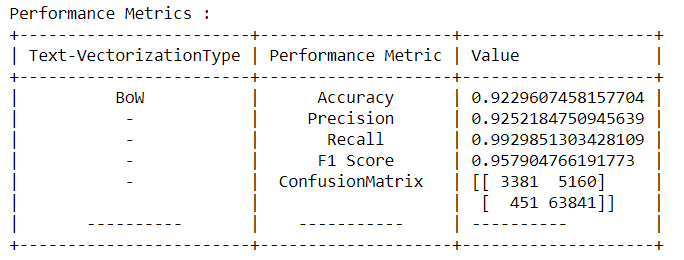

#### Performance Metrics with adding Summary comment from the Amazon food review dataset to the Review comments.

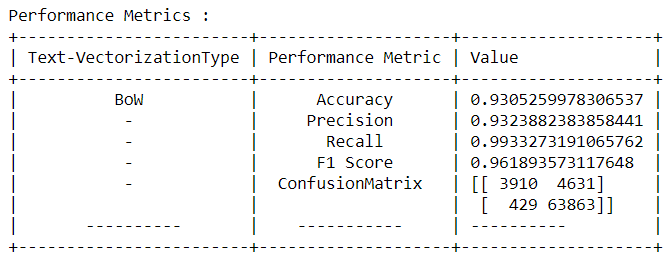

#### We see some improvement in the Performance Metric when Summary comments were added to the review comments. The FalsePositive values reduced by just 10% between Text that had summary added to them and Text that had summary withheld from it. This is not a significant improvement.

### Vectorization Method : TermFrequency-InverseDocumentFrequency (TF_IDF)

#### Convert review text into numeric vectors using TF_IDF

In [23]:
#TF-IDF
# Apply TF-IDF vectorization only on the trainingset.
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))

In [24]:
#Train you tf-idf vectorizer on the train data (.fit_transform()) and 
#use the same vectorizer on the test set as well (.transform())
final_tf_idf = tf_idf_vect.fit_transform(X_train.values.astype('U'))

print("the type of TIDF vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

the type of TIDF vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (218502, 2220905)
the number of unique words including both unigrams and bigrams  2220905


#### Use the TF-IDF vectorizer trained in the preceding step to convert cvset and testset to vectors.

In [25]:
#use the same countvectorizer on the cvset and testset.
final_tf_idf_cvset = tf_idf_vect.transform(X_cv.values)
print("the type of TFIDF vectorizer ",type(final_tf_idf_cvset))
print("the shape of out text TFIDF vectorizer ",final_tf_idf_cvset.get_shape())
print("the number of unique words ", final_tf_idf_cvset.get_shape()[1])

#use the same countvectorizer on the testset.
final_tf_idf_testset = tf_idf_vect.transform(X_test.values)
print("the type of TFIDF vectorizer ",type(final_tf_idf_testset))
print("the shape of out text TFIDF vectorizer ",final_tf_idf_testset.get_shape())
print("the number of unique words ", final_tf_idf_testset.get_shape()[1])

the type of TFIDF vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (72833, 2220905)
the number of unique words  2220905
the type of TFIDF vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (72833, 2220905)
the number of unique words  2220905


#### Standardize / Normalize the data

In [26]:
# Data-preprocessing: Normalizing the data
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

#Standardize on the train data (.fit_transform()) and #use the same Normalizer on the cvset and testset as well (.transform())
X_train_stdzd = normalizer.fit_transform(final_tf_idf)
X_cv_stdzd    = normalizer.transform(final_tf_idf_cvset)
X_test_stdzd  = normalizer.transform(final_tf_idf_testset) 

#### Hyper-Parameter Tuning : Using the cross-validation dataset to calculate the optimal 'alpha' of Naive Bayes in TF-IDF case.

[0.0, -2.3025850929940455, -4.605170185988091, -6.907755278982137, -9.210340371976182, -11.512925464970229]
[0.8463102368261992, 0.887469472102198, 0.9164184941190626, 0.9016284430783781, 0.8909886902590296, 0.8849063713838483]


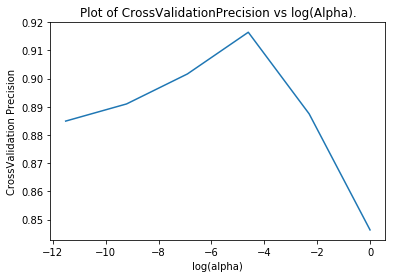

Starttime is : 2018-11-15 11:32:20.896982
Endtime   is : 2018-11-15 11:32:23.867210


In [27]:
# Import the Multinomial NaiveBayes,GridSearchCV and precision modules.
# Reasoning for choosing MultinomialNB : MultinomialNaiveBayes is the preferred choice for text classification problems.
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import precision_score

# Set the start time of the current cell run.
starttime_nb_tfidf = datetime.datetime.now()

# Set the range for the hyper-parameters.
# We Know from theory:
#          when alpha = 0, then model overfits
#          when alpha is large ~= 10000, then model underfits

# Experiment with different combination of alpha ranges.
#alpha = [10000.0,1000.0,100.0,10.0,1.0,0.0]
#alpha = [10.0,9.0,8.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0,0.0]
alpha = [1.0,0.1,0.01,0.001,0.0001,0.00001]
#alpha = [0.1,0.08,0.06,0.04,0.02,0.01,0.008,0.006,0.004,0.002,0.001]
# Use the cross-validation dataset to determine the best hyper-parameter alpha.
# Loop through various values of alpha.
plot_X = []
plot_Y = []
for i in alpha:
    nb_optimal = MultinomialNB(alpha=i)          # Iterate through various values of alpha.
    nb_optimal.fit(X_train_stdzd, Y_train)       # fitting the Multinomial NaivesBayes model on the training set.
    Y_pred = nb_optimal.predict(X_cv_stdzd)      # predict the response from the Multinomial NaivesBayes model on the cv set.
    plot_X.append(np.log(i))                     # plot log(alpha) in the x-axis.
    plot_Y.append(precision_score(Y_cv,Y_pred))  # plot precision score in the y-axis.

#print X,Y
print(plot_X)
print(plot_Y)

# Plot X-axis = log(alpha),Y-axis = precision to determine the best hyper-parameter.
plt.plot(plot_X,plot_Y)
plt.title("Plot of CrossValidationPrecision vs log(Alpha).")  # Set the title of the plot.
plt.xlabel("log(alpha)")                                      # Set the x label of the plot.
plt.ylabel("CrossValidation Precision")                       # Set the y label of the plot
plt.show()                                                    # render the plot.

# Set the end time of the current cell run.
endtime_nb_tfidf = datetime.datetime.now()

# Print the cell run duration.
print("Starttime is : {}".format(starttime_nb_tfidf))
print("Endtime   is : {}".format(endtime_nb_tfidf))

In [28]:
# Print the shape of the Input features X and class label Y for training and test set.
print("Trainingset X: {}".format(X_train_stdzd.shape))
print("CVset       X: {}".format(X_cv_stdzd.shape))
print("Testset     X: {}".format(X_test_stdzd.shape))

print("Trainingset Y: {}".format(Y_train.shape))
print("CVset       Y: {}".format(Y_cv.shape))
print("Testset     Y: {}".format(Y_test.shape))

Trainingset X: (218502, 2220905)
CVset       X: (72833, 2220905)
Testset     X: (72833, 2220905)
Trainingset Y: (218502,)
CVset       Y: (72833,)
Testset     Y: (72833,)


#### Error plots for varying combination of apha ranges.

#### Aplha range : 0 to 10000

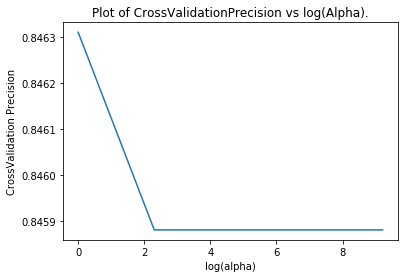

#### Observations :
    We observe, the curve moving towards a uniform distribution when log(alpha) exceeds 2.
    The CrossValidation Precision is maximum when log(alpha) = 0 which is our starting range. Hence it could lie close to 0.
    Here alpha ranges from 0 to 10000.

#### Alpha Range : 0 to 10

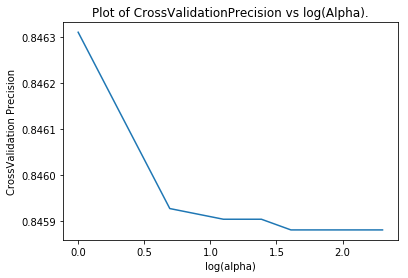

#### Observations :
    We observe that, the CrossValidation Precision is maximum when log(alpha) = 0, which is our starting range. Hence it     could lie close to 0.
    Here alpha ranges from 0 to 10.

#### Alpha range : 0 to 1

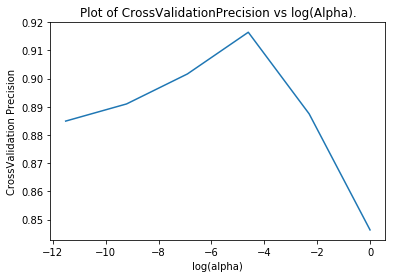

#### Observations :
    The cross-validation precision is maximum when log(alpha) ~= -4.6 .
    Therefore alpha = exponential(log(alpha)) = np.exp(-4.6) = 0.01
    Here alpha ranges from 0 to 1.

#### Hyper-parameter Choice : 
      Based on the CV plots for varying combination of alpha ranges, alpha = 0.01 when alpha range is between 0 and 1 is the best choice.

#### Fit the Naive Bayes model in TF_IDF case in the test set and compute the error metrics.

In [29]:
# ============================== NB with alpha = optimal alpha ===============================================

# Set the start time of the current cell run.
starttime_nb_tfidf = datetime.datetime.now()

# instantiate the Multinomial NaivesBayes learning model with alpha = 0.01 based on the above error plots .
nb_optimal = MultinomialNB(alpha=0.01)
nb_optimal.fit(X_train_stdzd, Y_train)           # fitting the Multinomial NaivesBayes model.
Y_pred_test = nb_optimal.predict(X_test_stdzd)   # predict the response from the Multinomial NaivesBayes model.

# Set the end time of the current cell run.
endtime_nb_tfidf = datetime.datetime.now()

# Print the cell run duration.
print("Starttime : {}".format(starttime_nb_tfidf))
print("Endtime   : {}".format(endtime_nb_tfidf))

Starttime : 2018-11-15 11:32:41.166059
Endtime   : 2018-11-15 11:32:41.616507


#### Plot the classifier performance metrics.

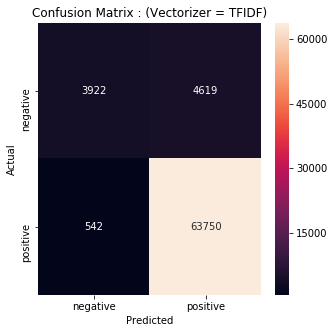

In [30]:
# evaluate the model and report the metrics.
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Y_test, Y_pred_test)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d'
            ,xticklabels=['negative','positive'], yticklabels=['negative','positive'])
plt.title('Confusion Matrix : (Vectorizer = TFIDF)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [31]:
#Class composition in the testset.
dfYTest = pd.DataFrame(list(Y_test),columns=['Comment'])
#print(list(Y_test))
print(dfYTest["Comment"].value_counts())

1    64292
0     8541
Name: Comment, dtype: int64


In [69]:
# Load the classification metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# Load the prettytable
from prettytable import PrettyTable

# Instantiate the prettytable module.
x = PrettyTable()
# Set the column names for the table.
x.field_names = ["Text-VectorizationType","Performance Metric", "Value"]

# Add the classification metrics to the table.
x.add_row(['TF-IDF','Accuracy',accuracy_score(Y_test,Y_pred_test)])
x.add_row(['-','Precision',precision_score(Y_test,Y_pred_test)])
x.add_row(['-','Recall',recall_score(Y_test,Y_pred_test)])
x.add_row(['-','F1 Score',f1_score(Y_test,Y_pred_test)])
x.add_row(['-','ConfusionMatrix',confusion_matrix(Y_test, Y_pred_test)])
x.add_row(['----------','-----------','----------'])

# Add the classification metrics to the final summary table.
summaryTable.add_row(['TF-IDF','0.01','Accuracy',accuracy_score(Y_test,Y_pred_test)])
summaryTable.add_row(['-','0.01','Precision',precision_score(Y_test,Y_pred_test)])
summaryTable.add_row(['-','0.01','Recall',recall_score(Y_test,Y_pred_test)])
summaryTable.add_row(['-','0.01','F1 Score',f1_score(Y_test,Y_pred_test)])
summaryTable.add_row(['-','0.01','ConfusionMatrix',confusion_matrix(Y_test, Y_pred_test)])
summaryTable.add_row(['----------','-----------','----------','----------'])

# Apply data alignment.
x.align["Value"] = "l"

# Print the table.
print("Performance Metrics :")
print(x)

Performance Metrics :
+------------------------+--------------------+--------------------+
| Text-VectorizationType | Performance Metric | Value              |
+------------------------+--------------------+--------------------+
|         TF-IDF         |      Accuracy      | 0.9291392637952577 |
|           -            |     Precision      | 0.9324401409995758 |
|           -            |       Recall       | 0.9915697131835999 |
|           -            |      F1 Score      | 0.9610963282351257 |
|           -            |  ConfusionMatrix   | [[ 3922  4619]     |
|                        |                    |  [  542 63750]]    |
|       ----------       |    -----------     | ----------         |
+------------------------+--------------------+--------------------+


#### Feature Importance

In [35]:
## Feature Importance : Gets the top 10 features based on importance for both positive and negative classes.
neg_class_prob_sorted = nb_optimal.feature_log_prob_[0, :].argsort()
pos_class_prob_sorted = nb_optimal.feature_log_prob_[1, :].argsort()

# Sort on ascending order the top 10 features based on importance.
features_negativeclass = (np.take(count_vect.get_feature_names(), neg_class_prob_sorted[2220895:]))
features_positiveclass = (np.take(count_vect.get_feature_names(), pos_class_prob_sorted[2220895:]))

print("The top 10 features for negative class are : \n{}".format(features_negativeclass))
print()
print("The top 10 features for positive class are : \n{}".format(features_positiveclass))

The top 10 features for negative class are : 
['tri' 'disappoint' 'buy' 'one' 'would' 'flavor' 'coffe' 'product' 'like'
 'tast']

The top 10 features for positive class are : 
['use' 'product' 'flavor' 'tea' 'like' 'tast' 'coffe' 'good' 'love'
 'great']


In [36]:
# Print the top 10 features of positive and negative classes in a prettytable format.
from prettytable import PrettyTable

# Instantiate the prettytable method.
x = PrettyTable()
# Set the column names for the table.
x.field_names = ["ClassType","FeatureRank", "FeatureName"]

# Add top 10 features of the Negative class.
for icount,ele in enumerate(list(features_negativeclass[::-1])):   # sort the top 10 features based on importance.
    x.add_row(['Negative',(icount+1),ele])                         # add the feature to the table.

x.add_row(['----------','-----------','----------------'])         # add a line break to indicate class separation.

# Add top 10 features of the Positive class.
for icount,ele in enumerate(list(features_positiveclass[::-1])):   # sort the top 10 features based on importance.
    x.add_row(['Positive',(icount+1),ele])                         # add the feature to the table.

# Left align the entries of the column "FeatureName"    
x.align["FeatureName"] = "l"

#Print the table.
print("Top 10 Features By Importance :")
print(x)

Top 10 Features By Importance :
+------------+-------------+------------------+
| ClassType  | FeatureRank | FeatureName      |
+------------+-------------+------------------+
|  Negative  |      1      | tast             |
|  Negative  |      2      | like             |
|  Negative  |      3      | product          |
|  Negative  |      4      | coffe            |
|  Negative  |      5      | flavor           |
|  Negative  |      6      | would            |
|  Negative  |      7      | one              |
|  Negative  |      8      | buy              |
|  Negative  |      9      | disappoint       |
|  Negative  |      10     | tri              |
| ---------- | ----------- | ---------------- |
|  Positive  |      1      | great            |
|  Positive  |      2      | love             |
|  Positive  |      3      | good             |
|  Positive  |      4      | coffe            |
|  Positive  |      5      | tast             |
|  Positive  |      6      | like             |
|  Posit

#### CONCLUSION :

#### Performance Metrics without adding Summary comments from the Amazon food review dataset to the Review comments.

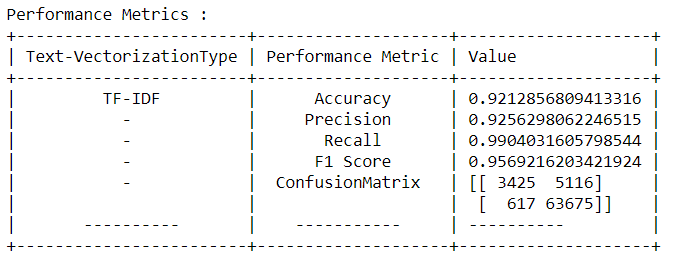

#### Performance Metrics with adding Summary comment from the Amazon food review dataset to the Review comments.

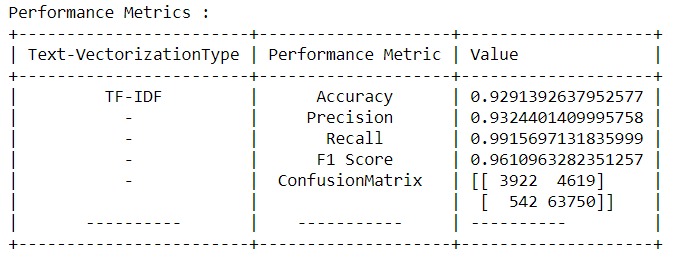

#### We see some improvement in the Performance Metric when Summary comments were added to the review comments. The FalsePositive values reduced by just 10% between Text that had summary added to them and Text that had summary withheld from it. This is not a significant improvement.

### FINAL SUMMARY :

In [70]:
# Use a new prettytable to add BoW and tfidf rows.

# Apply data alignment.
summaryTable.align["Value"] = "l"
summaryTable.align["Hyper-Paramter(alpha)"] = "l"

# Print the table.
print("Summary :")
print(summaryTable)

Summary :
+------------------------+-----------------------+--------------------+--------------------+
| Text-VectorizationType | Hyper-Paramter(alpha) | Performance Metric | Value              |
+------------------------+-----------------------+--------------------+--------------------+
|          BoW           | 0.01                  |      Accuracy      | 0.9305259978306537 |
|           -            | 0.01                  |     Precision      | 0.9323882383858441 |
|           -            | 0.01                  |       Recall       | 0.9933273191065762 |
|           -            | 0.01                  |      F1 Score      | 0.961893573117648  |
|           -            | 0.01                  |  ConfusionMatrix   | [[ 3910  4631]     |
|                        |                       |                    |  [  429 63863]]    |
|       ----------       | -----------           |     ----------     | ----------         |
|         TF-IDF         | 0.01                  |      Accu

#### Concluding Summary : 
#### The MultiNomial Naive Bayes was found to perform better in terms of time with respect to k-NN for text processing tasks.  The cause of concern in MultiNomial Naive Bayes, is the high amount of FalsePositive that we have for both BoW and TF-IDF vectorizers. Inclusion of extra relevant comments ( Summary column from the Amazon food review dataset ) did little to reduce the FalsePositive counts. This necessitates further exploration of other Text encoding methods. 